<a href="https://colab.research.google.com/github/PavelStelmakhV/hw310-keras-fasion-mnist/blob/main/keras_fasion_mnist_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from keras import layers
from keras import regularizers
from keras import callbacks
from keras import initializers
from keras.layers import BatchNormalization

In [109]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [110]:
# x_train = x_train.reshape(60000, 784).astype('float32') / 255
# x_test = x_test.reshape(10000, 784).astype('float32') / 255
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

# Перемешаем тренировочные данные
# train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
# train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

In [111]:
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

In [112]:
w_init = initializers.glorot_normal()
b_init = initializers.Zeros()

In [113]:
model = tf.keras.Sequential()

drop_out = 0.25
lern_rat = 0.001
neurons = 64

model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dropout(0.35))

model.add(layers.Dense(neurons * 1, activation='relu', kernel_initializer=w_init, bias_initializer=b_init)) #, kernel_regularizer=regularizers.l2(lern_rat)
model.add(BatchNormalization())
model.add(layers.Dropout(drop_out))
model.add(layers.Dense(neurons * 2, activation='tanh'))
model.add(BatchNormalization())
model.add(layers.Dropout(drop_out))

# model.add(layers.Dense(neurons * 4, activation='relu'))
# model.add(BatchNormalization())
# model.add(layers.Dropout(drop_out * 1.5))

# model.add(layers.Dense(neurons * 2, activation='tanh'))
# model.add(BatchNormalization())
# model.add(layers.Dropout(drop_out * 2))

model.add(layers.Dense(10, activation='softmax'))

In [114]:
model.compile(#optimizer='adam',
              optimizer='adamax',
              # optimizer='nadam',
              # optimizer='rmsprop',
              # optimizer='sgd',
              # optimizer='adadelta',
              # loss='binary_crossentropy',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['sparse_categorical_accuracy']) # sparse_categorical_accuracy

1/1 [==============================] - 0s 97ms/step


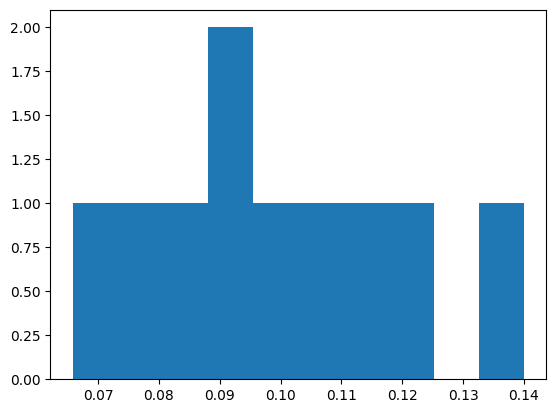

In [115]:
x = np.random.random((1, 28, 28))
a = model.predict(x)
_ = plt.hist(np.transpose(a))

In [116]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [117]:
callback = callbacks.EarlyStopping(monitor='val_loss',
                                   patience=50,
                                   restore_best_weights=True,
                                   )
es = callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = callbacks.ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)


In [118]:
# model.fit(train_images, train_labels, epochs=20)
history = model.fit(x_train, y_train,
                    epochs=100,
                    batch_size=64 ,
                    callbacks=[callback],
                    # callbacks=[es, mc],
                    verbose=1, #многословие
                    validation_data=(x_val, y_val))
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

Epoch 1/100
782/782 [==============================] - 5s 5ms/step - loss: 0.9137 - sparse_categorical_accuracy: 0.6741 - val_loss: 0.5290 - val_sparse_categorical_accuracy: 0.8034
Epoch 2/100
782/782 [==============================] - 5s 6ms/step - loss: 0.6619 - sparse_categorical_accuracy: 0.7597 - val_loss: 0.4775 - val_sparse_categorical_accuracy: 0.8261
Epoch 3/100
782/782 [==============================] - 4s 5ms/step - loss: 0.5967 - sparse_categorical_accuracy: 0.7837 - val_loss: 0.4460 - val_sparse_categorical_accuracy: 0.8345
Epoch 4/100
782/782 [==============================] - 4s 5ms/step - loss: 0.5616 - sparse_categorical_accuracy: 0.7954 - val_loss: 0.4377 - val_sparse_categorical_accuracy: 0.8407
Epoch 5/100
782/782 [==============================] - 5s 6ms/step - loss: 0.5380 - sparse_categorical_accuracy: 0.8060 - val_loss: 0.4190 - val_sparse_categorical_accuracy: 0.8451
Epoch 6/100
782/782 [==============================] - 4s 5ms/step - loss: 0.5183 - sparse_cate

In [119]:
print('\nhistory dict:', list(history.history.keys()))


history dict: ['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy']


In [120]:
result = model.evaluate(x_test, y_test)
print(result)

313/313 [==============================] - 1s 2ms/step - loss: 0.3361 - sparse_categorical_accuracy: 0.8764
[0.3360990881919861, 0.8763999938964844]


In [121]:
# from keras.models import load_model
# saved_model = load_model('best_model.h5')
# # _, train_acc = saved_model.evaluate(x_train, y_train, verbose=0)
# _, test_acc = saved_model.evaluate(x_test, y_test, verbose=0)
# print('Test: %.3f' % (test_acc))

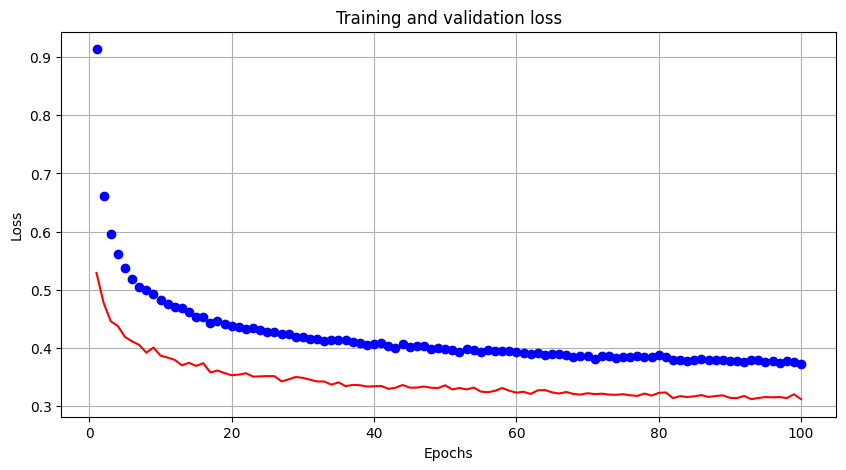

<Figure size 640x480 with 0 Axes>

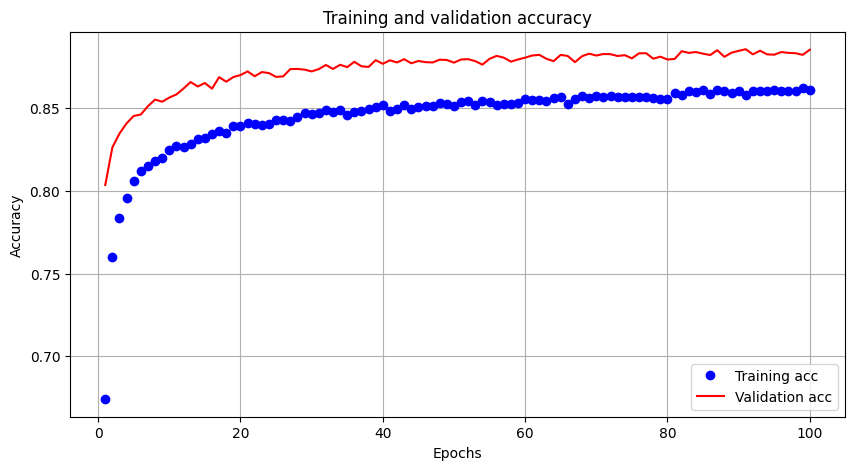

In [122]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['loss']) + 1)

plt.figure(figsize=(10, 5))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
# plt.legend()
plt.grid(True)
plt.show()

plt.clf()
plt.figure(figsize=(10, 5))
val_acc_values = history_dict['sparse_categorical_accuracy']
plt.plot(epochs, history_dict['sparse_categorical_accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_sparse_categorical_accuracy'], 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

In [123]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [124]:
predictions = probability_model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [125]:
predictions[0]

array([0.08621249, 0.08621237, 0.08621258, 0.08621255, 0.08621258,
       0.08768643, 0.08621276, 0.09132996, 0.08621275, 0.21749543],
      dtype=float32)

In [126]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dropout_17 (Dropout)        (None, 784)               0         
                                                                 
 dense_22 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_16 (Ba  (None, 64)                256       
 tchNormalization)                                               
                                                                 
 dropout_18 (Dropout)        (None, 64)                0         
                                                                 
 dense_23 (Dense)            (None, 128)               8320      
                                                     